
# **PRACTICA2: Análisis de dimensionalidad: PCA, Kernel PCA e ISOMAP**

*Elaborado por:

Luis Fernando Becerra, BEDA Aprendizaje de Máquinas 2024-1S - 2025-1S

Andres Esteban Marin Manco, BEDA Aprendizaje de Máquinas 2025-1S*

<p align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*a3YxMfs2E0eXag1ttLHmSQ.png" width="400"/>
</p>

El análisis de dimensionalidad es una técnica esencial en ciencia de datos y aprendizaje automático.  
Permite **reducir el número de variables** (o características) en un conjunto de datos, manteniendo la mayor cantidad de información posible.

### ¿Por qué es útil?

- Elimina ruido o redundancias.
- Mejora la eficiencia y el rendimiento de modelos.
- Facilita la visualización de datos complejos en 2D o 3D.
- Reduce el sobreajuste en modelos de machine learning.



### Técnicas que exploraremos

1. **PCA** – Análisis de Componentes Principales: técnica lineal que busca las direcciones de mayor varianza.
2. **Kernel PCA** – Extensión no lineal de PCA que usa funciones kernel para capturar relaciones más complejas.
3. **ISOMAP** – algoritmo de reducción de dimensionalidad no lineal que busca preservar la estructura geométrica intrínseca de los datos de alta dimensión en un espacio de menor dimensión..

##Importar librerias

Primero, importamos las librerías fundamentales:

- `numpy` y `pandas`: para manejar datos numéricos y estructuras tipo DataFrame.
- `matplotlib.pyplot` y `seaborn`: para crear visualizaciones.
- Posteriormente se usarán herramientas de `sklearn` para aplicar PCA, Kernel PCA e ISOMAP

In [3]:
#importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#   1. Análisis de componentes principales (PCA):

El **Análisis de Componentes Principales (PCA)** es una técnica de reducción de dimensionalidad que busca **minimizar el número de variables** (o columnas) sin perder gran parte de la información original.

Es especialmente útil cuando se trabaja con datasets de **alta dimensión**, como aquellos con **cientos o miles de variables**, ya que permite:
- Simplificar los datos.
- Mejorar el rendimiento de los modelos.
- Reducir el riesgo de sobreajuste.

<br>

###<b>¿Cómo funciona?</b></font>


Mientras que la regresión determina una línea de mejor ajuste a un conjunto de datos, el análisis factorial o el análisis de componentes principales determina varias líneas ortogonales de mejor ajuste al conjunto de datos. Las líneas son perpendiculares entre sí en un espacio de n dimensiones, en el que n dimensiones es el espacio muestral de las variables. Hay tantas dimensiones como variables, es decir, un conjunto de datos con 4 variables, el espacio muestral es de 4 dimensiones.

- Si tu conjunto de datos tiene `n` variables, el PCA trabaja en un espacio de `n` dimensiones.
- Estas nuevas direcciones se llaman **componentes principales**.
- Cada componente representa una combinación lineal de las variables originales.

<br>

### <b>¿Qué logra el PCA?</b></font>

- **Transforma** los datos a un nuevo espacio de menor dimensión.
- Intenta conservar los componentes que **explican la mayor varianza** posible.
- **Descarta** los componentes que aportan poca o ninguna variabilidad, reduciendo así el ruido y la complejidad.

#Carga de datos
Para esta practica utilizaremos la base de datos Wine de la Universidad UC Irvine. Vamos a emplear a reducción de dimensiones tanto para visualizar los datos como para mejor la discriminación de tres tipos de variedades de vinos.

Las caracteristicas incluyen diferentes componentes quimicos medidos en laboratorio.

1. Alcohol
2. Ácido málico
3. Ceniza
4. Alcalinidad de la ceniza
5. Magnesio
6. Fenoles totales
7. Flavanoides
8. Fenoles no flavonoides
9. Proantocianinas
10. Intensidad de color
11. Tono
12. DO280/OD315 de vinos diluidos
13. Prolina


In [4]:
#Leer datos
df = pd.read_csv("Wine.csv")

Exploremos los datos!!

In [5]:
#Revisar los 5 primeros elementos
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
#Nombre de las caracteristicas
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

En este conjunto de datos hay 14 dimensiones o variables, por lo que es difícil visualizarlas todas. Podemos utilizar PCA para aprender los dos componentes más importantes de los datos y visualizarlos en este nuevo espacio bidimensional.

Tenemos que aplicar el PCA antes de aplicar el algoritmo de aprendizaje automático.

Deberíamos aplicarlo a las características, no al valor objetivo "Customer Segment" en este conjunto de datos. Por tanto, vamos a crear un dataframe con todas las columnas excepto la ultima (correspondiente al tipo de vino)


In [7]:
#Organizar dataframe
X = df.drop("Customer_Segment",axis=1).values
y = df["Customer_Segment"].values

Ahora vamos a dividir los datos en los dos conjuntos: entrenamiento y prueba. Empleando 70% de los datos para entrenar. Esto con el fin de probar que ocurre con la discriminación de las clases cuando aplicamos PCA.

In [8]:
#Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

Antes de usar PCA en los datos, necesitamos necesitamos estandarizar las diferentes caracteristicas, para esto utilizaremos StandardScaler de sklearn. El cual transforma los datos a muestras con media cero y desviación estandar igual a 1. Esta normalizacion es la más recomendada cuando se va aplicar PCA.

In [9]:
#Importar StandardScaler
from sklearn.preprocessing import StandardScaler
#Aplicar la transformación a los datos de entrenamiento
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
#Usar la transformación a los datos de evaluación
X_test = sc.transform(X_test)

Nota importante: cuando entrenamos un clasificador o regresor con datos reducidos, es muy importante que al aplicarlo a otros datos estos se encuentren normalizados!!!

In [10]:
X_train.shape

(124, 13)

Text(0, 0.5, 'Malic_Acid')

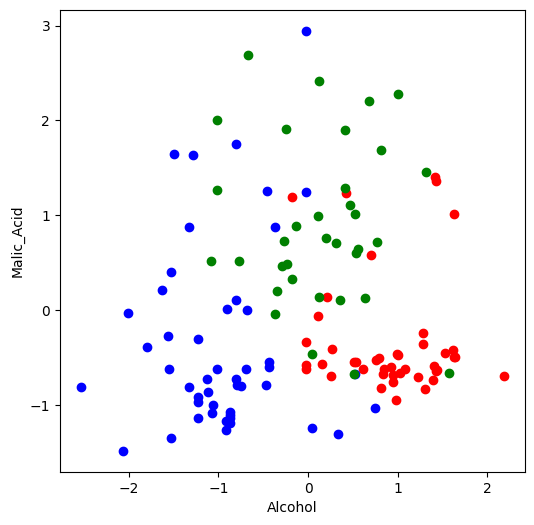

In [11]:
#Grafiquemos dos dimensiones de los datos!!
plt.figure(figsize=(6,6))
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='r')
plt.scatter(X_train[y_train==2,0],X_train[y_train==2,1],c='b')
plt.scatter(X_train[y_train==3,0],X_train[y_train==3,1],c='g')
plt.xlabel("Alcohol")
plt.ylabel("Malic_Acid")

##Aplicar PCA
PCA es una tecnica muy comun que vamos a encontrar implementada en diferentes paquetes estadisticos. Vamos a usar la implementación disponible en sklearn.

In [12]:
#Importar PCA
from sklearn.decomposition import PCA
#Inicializar PCA: vamos a comenzar probando con 2 componentes principales para la proyección
pca = PCA(n_components=2)
#Calcular PCA y realizar la transformación de datos de entrenamiento
X_train_2d = pca.fit_transform(X_train)
#Aplicar a los datos de prueba
X_test_2d = pca.transform(X_test)

Revisemos la dimension de los datos reducidos

In [13]:
# Hemos  reducido las  caracteristicas en 2
print(X_train_2d.shape)
print(X_test_2d.shape)

(124, 2)
(54, 2)


Vamos a graficar los datos de entrenamiento proyectados en la primera y segunda componente princial.

Text(0, 0.5, 'The Second Principal Component')

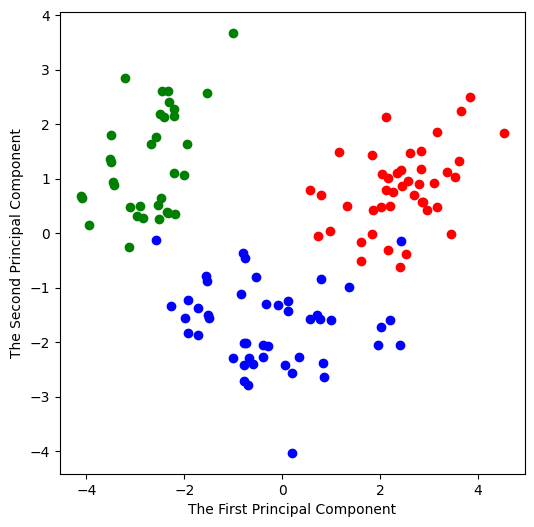

In [14]:
#Grafica de dos dimensiones
plt.figure(figsize=(6,6))
plt.scatter(X_train_2d[y_train==1,0],X_train_2d[y_train==1,1],c='r')
plt.scatter(X_train_2d[y_train==2,0],X_train_2d[y_train==2,1],c='b')
plt.scatter(X_train_2d[y_train==3,0],X_train_2d[y_train==3,1],c='g')
plt.xlabel("The First Principal Component")
plt.ylabel("The Second Principal Component")


In [15]:
#Las PCA son vectores a los cuales se proyecta los datos
pca.components_

array([[ 0.16986623, -0.24661863, -0.05779149, -0.30511849,  0.13935833,
         0.3761083 ,  0.41250873, -0.30927604,  0.31176122, -0.03218936,
         0.26779071,  0.35345774,  0.30384008],
       [ 0.48041428,  0.20238918,  0.32795414,  0.00789651,  0.26635404,
         0.05431344, -0.03265993,  0.01995453,  0.05840081,  0.54691562,
        -0.29588538, -0.2037972 ,  0.33712962]])

Importante: el proceso de transformación PCA no tiene en cuenta las etiquetas de los datos!!

## <b>Interpretar los componentes principales</b></font>

Después de aplicar PCA, podemos acceder a los **componentes** con `pca.components_`.

Este arreglo nos muestra cómo cada **componente principal** está compuesto por una combinación lineal de las **características originales**.

- Cada **fila** representa un componente principal.
- Cada **columna** representa una característica del conjunto de datos original.

Para visualizar esta relación de forma más clara, convertimos estos datos en un `DataFrame`:


In [16]:
#Convertimos los datos a una dataframe
df_comp=pd.DataFrame(pca.components_)
df_comp

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.169866,-0.246619,-0.057791,-0.305118,0.139358,0.376108,0.412509,-0.309276,0.311761,-0.032189,0.267791,0.353458,0.30384
1,0.480414,0.202389,0.327954,0.007897,0.266354,0.054313,-0.032660,0.019955,0.058401,0.546916,-0.295885,-0.203797,0.33713


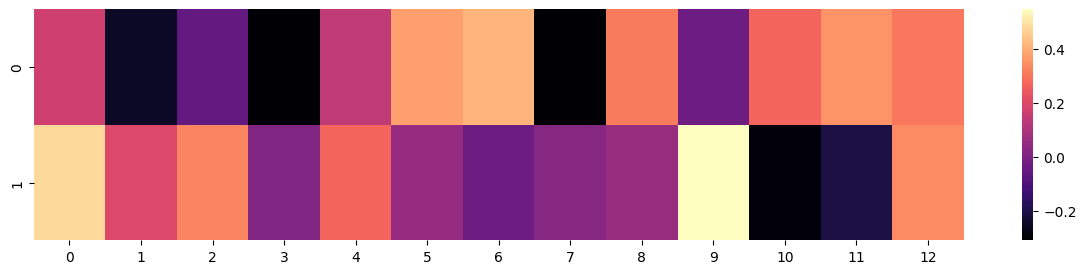

In [17]:
#Visualizamos los datos
plt.figure(figsize=(15,3))
sns.heatmap(df_comp,cmap="magma")
plt.show()

## <b>Mapa de calor de los componentes</b></font>

En este mapa de calor podemos ver la relación entre los componentes principales y las características reales.

- Los colores claros indican una **fuerte correlación positiva**.
- Los colores oscuros muestran una **correlación negativa o más débil**.

Los componentes principales son combinaciones lineales de todas las características del conjunto de datos.

Los componentes principales son **combinaciones lineales** de las variables originales. Gracias a esta transformación, podemos reemplazar un conjunto de variables complejas por **unos pocos componentes claros y separados**.

#Uso de datos para ML
Tras aplicar el PCA, podemos usar los datos proyectados para entrenar un modelo ML, en este caso vamos a usar una regresión logistica.

In [18]:
#Importarmos el modelo
from sklearn.linear_model import LogisticRegression
#Entrenamos un modelo con los datos originales (para comparar)
model = LogisticRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [19]:
#Entrenamos un modelo con los datos reducidor con PCA
model_pca = LogisticRegression()
model_pca.fit(X_train_2d,y_train)
predictions_pca = model_pca.predict(X_test_2d)

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        16
           2       0.96      0.92      0.94        24
           3       1.00      0.93      0.96        14

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54

kappa: 0.914466737064414


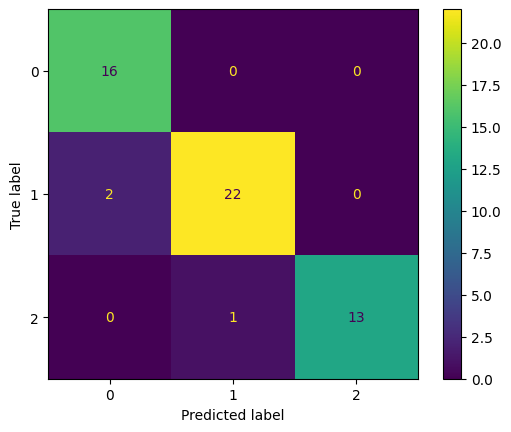

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
#Evaluar el desempeño - Modelo datos completo
#Matriz de confusión
cm = confusion_matrix(y_test, predictions)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
# Métricas de desempeño
print(classification_report(y_test,predictions))
print("kappa: " + str(cohen_kappa_score(y_test,predictions)))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        16
           2       0.88      0.92      0.90        24
           3       1.00      0.93      0.96        14

    accuracy                           0.91        54
   macro avg       0.92      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54

kappa: 0.8562300319488818


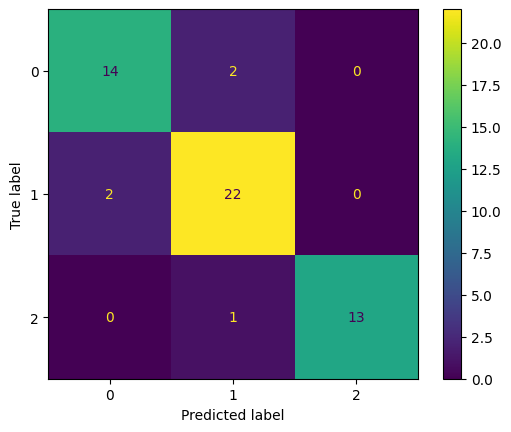

In [21]:
#Evaluar el desempeño - Modelo con PCA
#Matriz de confusión
cm_pca = confusion_matrix(y_test, predictions_pca)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_pca)
disp.plot()
# Métricas de desempeño
print(classification_report(y_test,predictions_pca))
print("kappa: " + str(cohen_kappa_score(y_test,predictions_pca)))


/tmp/ipython-input-22-2918250269.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


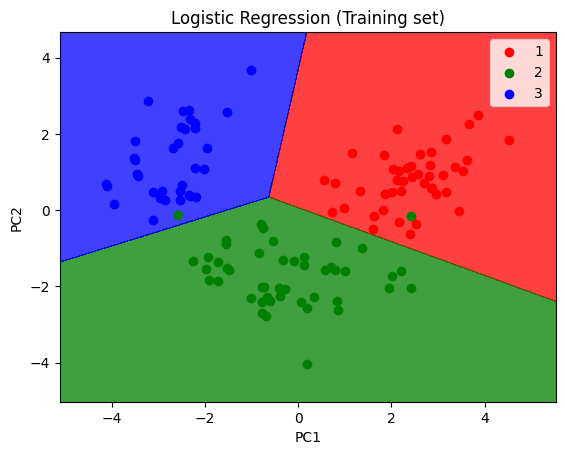

In [22]:
#Grafica de las fronteras de desicion
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_2d, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Este es el rendimiento del algoritmo con el conjunto de entrenamiento

/tmp/ipython-input-23-1797012017.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


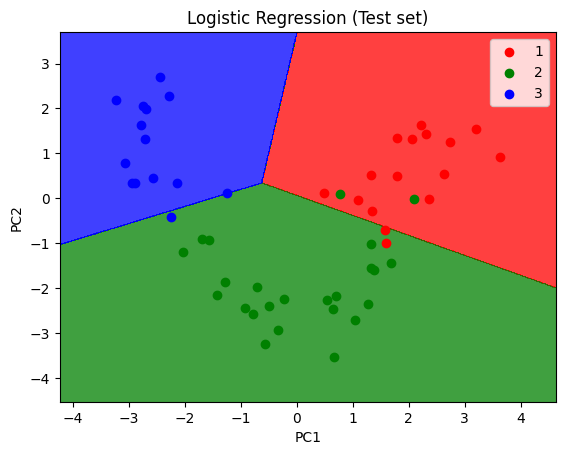

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_2d, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## <b>Rendimiento en el conjunto de prueba - Frontera de decisión</b></font>

Esta visualización muestra el rendimiento del modelo de **regresión logística** sobre el **conjunto de prueba**.

La distribución de los puntos dentro de sus respectivas regiones muestra que el modelo también **generaliza bien fuera del conjunto de entrenamiento**.

Es evidente que podemos obtener **predicciones bastante buenas utilizando solo los dos primeros componentes principales**, en lugar de trabajar con todas las variables originales.

Esto demuestra que:

- **PCA** puede reducir la complejidad del modelo sin afectar negativamente el rendimiento.
- Es especialmente útil cuando trabajamos con **grandes volúmenes de datos con muchas características**.
- Ayuda a **visualizar y entender mejor** la estructura subyacente de los datos.

Método PCA no solo mejora la eficiencia, sino que también puede potenciar la interpretación y el rendimiento de los modelos.

#  2. Kernel PCA
Es otra tecnica de reducción de dimensiones no supervisada, que permite trabajar con no linealidades de los datos usando el truco kernel.

#  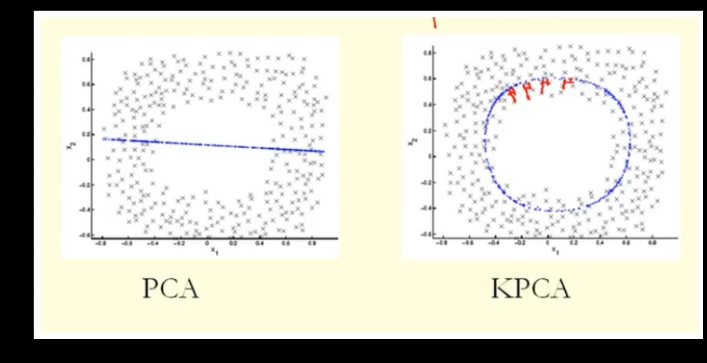

Los métodos kernel buscan una dimensión más alta, mientras que SVD busca una dimensión más baja.

PCA (como técnica de reducción de la dimensionalidad) intenta encontrar un subespacio lineal de baja dimensión al que se limitan los datos.

El Kernel PCA puede encontrar este múltiple no lineal y descubrir que los datos son, de hecho, casi unidimensionales.

Los datos se mapean en un espacio de mayor dimensión, pero luego resultan estar en un subespacio de menor dimensión del mismo. Así que se aumenta la dimensionalidad para poder reducirla.

Vamos a aplicar KPCA al mismo conjunto de datos


In [24]:
#Importamos KernelPCA
from sklearn.decomposition import KernelPCA
#Seleccionamos 2 componentes y el kernel gaussiano
kpca = KernelPCA(n_components=2, kernel= 'rbf')
#Calculamos las componentes principales y se proyectan los datos
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

Vamos aplicarle el mismo modelo regresión logistica, a los datos reducidos con kpca.


In [25]:
#Entrenamos el modelo
model_kpca = LogisticRegression()
model_kpca.fit(X_train_kpca,y_train)
predictions_kpca = model_kpca.predict(X_test_kpca)

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        16
           2       0.96      1.00      0.98        24
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

kappa: 0.9712765957446808


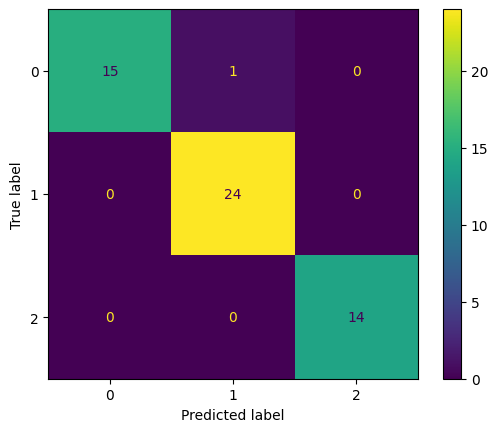

In [26]:
#Evaluar el desempeño - Modelo con KPCA
#Matriz de confusión
cmKPCA = confusion_matrix(y_test, predictions_kpca)
disp = ConfusionMatrixDisplay(confusion_matrix=cmKPCA)
disp.plot()
# Métricas de desempeño
print(classification_report(y_test,predictions_kpca))
print("kappa: " + str(cohen_kappa_score(y_test,predictions_kpca)))

/tmp/ipython-input-27-1124216627.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


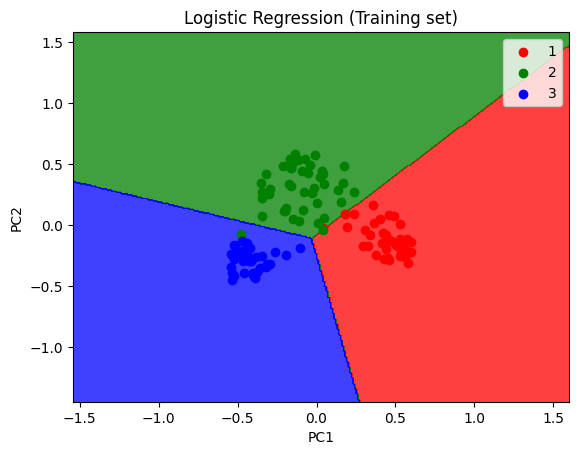

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_kpca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_kpca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

/tmp/ipython-input-28-2752473896.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


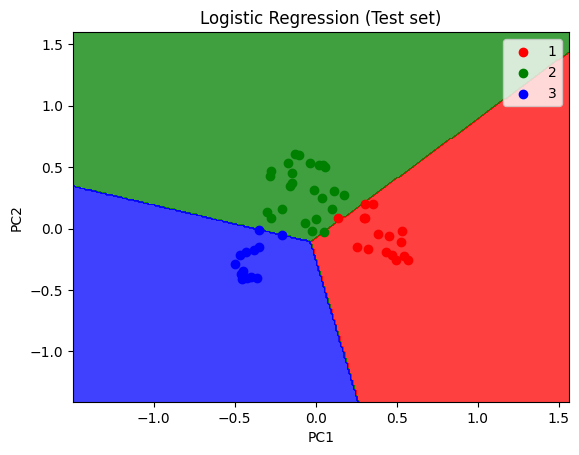

In [28]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_kpca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_kpca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

#  3. ISOMAP

Isomap (Isometric Mapping) es un algoritmo de reducción de dimensionalidad no lineal que busca preservar la estructura geométrica intrínseca de los datos de alta dimensión en un espacio de menor dimensión. En esencia, trata de mantener las distancias geodésicas (las distancias a lo largo de la superficie de los datos) entre los puntos de datos en la representación de menor dimensión.

**¿Cómo funciona Isomap?**
1. Construcción de un grafo de vecindad:
Se crea un grafo donde cada punto de datos es un nodo y las conexiones entre los nodos se basan en la distancia euclidiana (o una medida de vecindad definida por el usuario). Por lo general, se utiliza el método de los k vecinos más cercanos.
2. Cálculo de distancias geodésicas:
Se calcula la distancia más corta entre todos los pares de nodos en el grafo. Estas distancias aproximan las distancias geodésicas a lo largo de la variedad de datos.
3. Escalamiento multidimensional (MDS):
Se aplica MDS a la matriz de distancias geodésicas para encontrar una representación de menor dimensión que preserve estas distancias.

**Ventajas de Isomap:**
1. Manejo de variedades no lineales:
Isomap es capaz de descubrir la estructura intrínseca de datos que se encuentran en una variedad no lineal, donde métodos como el Análisis de Componentes Principales (PCA) pueden fallar.
2. Preservación de la estructura global:
Al enfocarse en las distancias geodésicas, Isomap intenta preservar la estructura global de los datos en la representación de menor dimensión.
3. Aplicaciones en visualización y exploración de datos:
Isomap puede ayudar a visualizar datos de alta dimensión, haciéndolos más fáciles de entender e interpretar.
4. Preprocesamiento para aprendizaje automático:
Se puede utilizar como un paso de preprocesamiento antes de aplicar otros algoritmos de aprendizaje automático.

**Desventajas de Isomap:**
1. Sensibilidad a los parámetros:
El algoritmo es sensible a la elección del número de vecinos (k) en la construcción del grafo.
2. Complejidad computacional:
La construcción del grafo de vecindad y el cálculo de las distancias geodésicas pueden ser computacionalmente costosos, especialmente para conjuntos de datos grandes.
3. Riesgo de ruptura del manifold:
En algunos casos, si el grafo no captura adecuadamente la estructura del manifold, Isomap puede producir resultados erróneos.


In [29]:
#Importamos isomap
from sklearn.manifold import Isomap
isomap = Isomap(n_neighbors=5)
#Calculamos las componentes principales y se proyectan los datos
X_train_isomap = isomap.fit_transform(X_train)
X_test_isomap = isomap.transform(X_test)

In [30]:
#Entrenamos el modelo
model_isomap = LogisticRegression()
model_isomap.fit(X_train_isomap,y_train)
predictions_isomap = model_isomap.predict(X_test_isomap)

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        16
           2       0.85      0.92      0.88        24
           3       1.00      0.86      0.92        14

    accuracy                           0.89        54
   macro avg       0.91      0.88      0.89        54
weighted avg       0.89      0.89      0.89        54

kappa: 0.8265524625267666


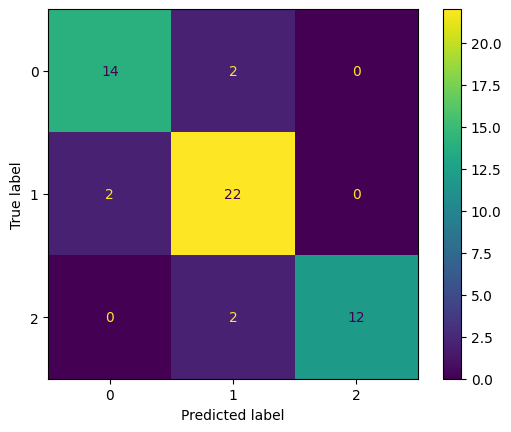

In [31]:
#Evaluar el desempeño - Modelo con isomap
#Matriz de confusión
cmISOMAP = confusion_matrix(y_test, predictions_isomap)
disp = ConfusionMatrixDisplay(confusion_matrix=cmISOMAP)
disp.plot()
# Métricas de desempeño
print(classification_report(y_test,predictions_isomap))
print("kappa: " + str(cohen_kappa_score(y_test,predictions_isomap)))

# ¡Gran trabajo!